`Remember to make a copy of this notebook !`

# Exercises for Session 8: Strings, Requests and APIs

In Assignment 0 we covered a lot about basic Python, and in the first sessions, we talked a bit about how to deal with different data types in pandas - strings among other. However, we only scratched the surface on string-related topics and in this session, we will be taking a deeper looking at. 

We will start out with a recap of some basic string operations and build on that to make a query for fetching data. After having finished this combined teaching module and exercise set, you will know the basics of collecting from the web. This notebook is structured as follows:
1. String Operations
2. Saving as Text File
3. Python Containers and Dictionaries
4. Python and the Web
5. Bonus Exercises $-$ Traffic Data in Copenhagen


*Alternative sources*: 
- If you get lost, you might find [this page](https://pythonprogramming.net/string-concatenation-formatting-intermediate-python-tutorial/) on pythonprogramming.net useful. 
- [This page](https://www.python-course.eu/python3_sequential_data_types.php) also gives an introduction to the basics of strings and their related data types. 

# Part 1: String Operations

As we have already learned, strings are sequential containers of characters. In Python we use two kinds of characters:
-  American Standard Code (`ascii`)
    - Characters from English alphabet, numbers, symbols for writing 
    - 8 bit information

- Unicode (`UTF`)  
    - Characters from European and Asian language and much more
    - 16 bit information
    - Available in URLs recently, e.g. [møn.dk](https://møn.dk)        
    
    
Note that while unicode is a little more heavy and costs more space, it is way more flexible and we get less errors when importing data from non-ascii languages. This reason is also why Python adopted unicode as standard since the release of Python 3.

To see that strings are sequential containers, see the example below where we slice them like a list or dataframe/array:

In [1]:
str1 = 'police'
str1[2:]

'lice'

## Common string operations 

Strings have multiple operations and functions associated. In this exercise, we investigate a few of these. We also explore the sequence form of a string and how it can be sliced and accessed via indices. In the following, we provide a small tour of some of the most important technical features of strings.

One thing that can be helpful when working with strings is that you can alter the sentence-case of strings by using the string methods `upper`, `lower`, `capitalize`. Consider the example below and try switching `upper()` with one of the other operations:

In [2]:
str1.upper()

'POLICE'

We can also use the `replace` method to substitute parts of the strings:

In [3]:
str1.replace('po', 'ma')

'malice'

We can also check whether a substring is within a given string and much more. The general syntax is 
```python 
T in S
``` 
which checks whether a string `S` contains the substring `T`. We should always get a boolean True/False outcome in return. See two applications below: 

In [4]:
print('ice' in str1, 'mice' in str1)

True False


Another procedure is to add strings together like below:

In [5]:
str2 = 'officer'
str1 + ' ' + str2

'police officer'

This can be helpful when we want to combine strings of words into sentences or long text files.

## More string operations 
In addition to the techniques above, strings are equipped with an array of _methods_, for solving more complex tasks. For example:
- `str.join(list)` will insert a string in between each element of a list
- `str.strip()` removes spaces in the beginning and end of a word 
- the f-string fills in specified blanks in a string
- `str1.split(str2)` splits `str1` into a list through all places where `str2` shows up

Below we illustrate the use of each function:

```python
>>> " ".join(['Hello', 'World!']) 
'Hello World!'

>>> ' Hello World!   '.strip() 
'Hello World!'

>>> w = 'World'
>>> f'Hello {w}' 
'Hello World!'

>>> 'a,b,c'.split(',') 
['a','b','c']
```

## Warm-up String Exercises

In the first couple of exercises, you should use the examples above to solve a set of tasks.

> **Ex. 8.1.1**: Let `s1='Chameleon'` and `s2='ham'`. Check whether the string `s2` is a substring of `s1`. Is `'hello'` a substring `'goodbye'`?



In [6]:
### BEGIN SOLUTION

s1, s2 = 'chameleon', 'ham'
#s1, s2 = 'hello', 'goodbye'

if s1 in s2:
    print(s1.capitalize() + ' is indeed part of ' + s2)
else:
    print(s1.capitalize() + ' is not part of ' + s2)
    
### END SOLUTION

Chameleon is not part of ham


> **Ex. 8.1.2**: From the string `s1` select the last four characters. What is the index of the character `a` in `s1`?

> *Hint*: We can selecti a substring by slicing it with the `[]` notation, from the start to end where start is included and end is excluded. Recall that Python has zero-based indexing, see explanation [here](https://softwareengineering.stackexchange.com/questions/110804/why-are-zero-based-arrays-the-norm).


In [7]:
### BEGIN SOLUTION

s1, s2 = 'chameleon', 'ham'

print(s1[-4:])
print(s1.index('a'))
    
### END SOLUTION

leon
2


> **Ex. 8.1.3:** Use the `join()` and `strip()` functions to retrieve the sentence `The quick brown fox jumps over the lazy dog` from the list  `list_of_words` in the code cell below. 

> *Hint:* If you want to challenge yourself, see if you can do this in one line with a list comprehension!

In [8]:
list_of_words = ['       The        ', '   quick   ', '     brown      ',
                 ' fox          ', '          jumps     ', '   over ',
                 '          the   ', '  lazy     ', '          dog     ']

In [9]:
### BEGIN SOLUTION
print(' '.join([list_of_words[i].strip() for i in range(len(list_of_words))]))
### END SOLUTION

The quick brown fox jumps over the lazy dog


> **Ex. 8.1.4:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
> _Hint:_ You should be able to combine the above information to solve this exercise.

In [10]:
### BEGIN SOLUTION
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']
print(l1[1]+' '+l1[0]+l1[2]+' '+l1[4][0]+l1[5])
### END SOLUTION

Is r > g?


# Part 2: Saving as Text File
In this course, we have already seen that we can output tabular data as CSV files. These files are essentially text files with specific structure that allows a computer to identify rows and columns. 

In the example below, we will learn how to actually save a string directly as a text file. Note how we make a line break using `\n` - this is a string escape sequence, read more [here](https://docs.python.org/3/reference/lexical_analysis.html#literals).

In [11]:
my_str = 'This is important...'
my_str2 = 'Written in Python!'
escape_seq = '\n'

with open('my_file.txt', 'w') as f:
    f.write(my_str+escape_seq+my_str2)

The code below opens the text file and prints the string.

In [12]:
with open('my_file.txt', 'r') as f:    
    print(f.read())

This is important...
Written in Python!


> **Ex. 8.2.1:** Create a .txt file called `to_do_list.txt` with a to-do list by looping over the list `to_do = ['1. Hit the gym', '2. Pay bills', '3. Meet George', '4. Buy eggs', '5. Read a book']` and writing each element on a seperate line.

In [13]:
to_do = ['1. Hit the gym', '2. Pay bills', '3. Meet George', '4. Buy eggs', '5. Read a book']

In [14]:
### BEGIN SOLUTION
with open('to_do_list.txt', 'w') as f:
    for i in range(len(to_do)):
        f.write(to_do[i]+'\n')
### END SOLUTION

Does the file look like you expected?

In [15]:
with open('to_do_list.txt', 'r') as f:    
    print(f.read())

1. Hit the gym
2. Pay bills
3. Meet George
4. Buy eggs
5. Read a book



# Part 3: Python Containers and Dictionaries

Dictionaries (`dict`) are a central building block of python. Python dicts are constructed from pairs of keys and values, making them extremely versatile for data storage. Like list, they can contain deep nested structures, e.g. a dict of dicts of lists

Try running the code below, where the keys are strings (names from recent Danish prime ministers) and values are also strings (e.g. political affiliation):

In [17]:
my_dict1 = {'Anders': "Venstre",
            'Helle': "Socialdemokratiet",
            'Lars': "Venstre",
            'Mette': "Socialdemokratiet"}

Now,  print the party of some (former) Danish prime minister by replacing `'Name'` below.

In [18]:
print(my_dict1['NAME'])

> **Ex. 8.3.1**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`.

> _Hint:_ One approach is to first construct a function that asseses whether a given word begins with a vowel or not.

In [19]:
### BEGIN SOLUTION
W =  ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']
vowels = ['a', 'e', 'i', 'o', 'u', 'y']
words = {}

for i in range(len(W)):
    words[W[i]] = W[i][0] in vowels
### END SOLUTION

> **Ex. 8.3.2:** Loop through the dictionary `words`. In each iteration, you should print a proper sentence stating if the current word begins with a vowel or not. 

> _Hint:_ You can loop through both keys and values simultaneously with the `.items()` method. [This](https://www.tutorialspoint.com/python/python_dictionary.htm) and [this](https://stackoverflow.com/questions/3294889/iterating-over-dictionaries-using-for-loops) might help you.

In [20]:
### BEGIN SOLUTION
for key, value in words.items():
    if value == True:
        print(key.capitalize() + ' begins with a vowel!')
    else:
        print(key.capitalize() + ' does not begin with a vowel...')
### END SOLUTION

Animal begins with a vowel!
Coffee does not begin with a vowel...
Python does not begin with a vowel...
Unit begins with a vowel!
Knowledge does not begin with a vowel...
Tread does not begin with a vowel...
Arise begins with a vowel!


We have also introduced the popular JSON file format which can store lists and dictionaries and hold the three fundamental data types `float`, `int` and `str`. The code example below uses the JSON module to save our dictionary. We use a trick by first converting the JSON file to a string. This can be done with the function `dumps` in the module `json`:

In [21]:
import json

with open('my_file.JSON', 'w') as f:
    my_json_str = json.dumps(words) # convert dictonary to string with JSON formatting
    f.write(my_json_str) # write the string to file

with open('my_file.JSON', 'r') as f:
    print(f.read()) # read the string from file

{"animal": true, "coffee": false, "python": false, "unit": true, "knowledge": false, "tread": false, "arise": true}


> **Ex. 8.3.3:** Install `https://pypi.org/project/Random-Word/` (documentation [here](https://pypi.org/project/Random-Word/)) by typing `pip install random-word` in your *Anaconda prompt*, and then run the line below. Doing so, you should get a list of 500 randomly drawn words. Now, create a dictionary that contains the length of each of these words (i.e. like `{'livering': 8, 'reiterate': 9,...}`) and save it as a json-file called `r_words.JSON`. Then read it and make sure that you got everything right.

In [22]:
from random_word import RandomWords
r = RandomWords()
r_words = r.get_random_words(limit=500)

In [23]:
### BEGIN SOLUTION
word_dict = {}
for i in range(len(r_words)):
    word_dict[r_words[i]] = len(r_words[i])
    
with open('r_words.JSON', 'w') as f:
    my_json_str = json.dumps(word_dict) # convert dictonary to string with JSON formatting
    f.write(my_json_str) # write the string to file

with open('r_words.JSON', 'r') as f:
    print(f.read()) # read the string from file
### END SOLUTION

{"haematology": 11, "nonfried": 8, "by-plot": 7, "pricket": 7, "Orient": 6, "stability": 9, "wazzer": 6, "advertiser": 10, "reprogenetics": 13, "usabilities": 11, "mouses": 6, "privatises": 10, "malignity": 9, "disemburdening": 14, "confection": 10, "goods-train": 11, "hussars": 7, "meccano": 7, "whomsoever": 10, "jaculating": 10, "lame-duck": 9, "winging": 7, "unflooded": 9, "isotonic": 8, "concretised": 11, "dandruffy": 9, "flung": 5, "foreside": 8, "pernancy": 8, "acceptable": 10, "wedsites": 8, "Judea": 5, "Simone": 6, "bumpf": 5, "behaviouralist": 14, "terrazzo": 8, "patternless": 11, "Edmontonians": 12, "megalithic": 10, "onology": 7, "crenates": 8, "artisticism": 11, "tempteth": 8, "igneous": 7, "distant": 7, "unmowed": 7, "deacetylating": 13, "unimported": 10, "NOFORN": 6, "salves": 6, "train-bolt": 10, "tzedakah": 8, "flirts": 6, "auctiongoers": 12, "surgeless": 9, "cupey": 5, "Lake Chad": 9, "close-mouthed": 13, "touzling": 8, "synergic": 8, "lime-powder": 11, "creels": 6, "s

<br>

# Part 4: Python and the Web

The internet is a massive source for collecting data. We just need to understand the the most fundamental protocols and how we work with them.

## Application Programming Interface (API)

APIs are protocols that allow us to request information and/or services from the provider of the API. In this course, we are mainly interested in APIs that provide data as a response to our requests.

## Building the Queries
We will now move on to understanding how we can interact with a web API in Python. First we will see how to build a query, which is simply a web address. By typing in a specific web address, the web server will receive information from us.

In the example below we build a URL that allows us to check out which repositories ISDSUCPH has publicly available.

In [62]:
server_url = 'https://api.github.com'
endpoint_path = '/users/NicklasJohansen/repos'
url = server_url + endpoint_path

print(url)

https://api.github.com/users/NicklasJohansen/repos


## Sending the Query
Python has a smart module, named `requests` (get it with `pip install requests`), that allows us to interact with the web. When we request a URL, we get a response in return. Among other things, it allows us to inspect the HTML code. In the example below, we query the URL for the GitHub API we made above. 

In [63]:
import requests # import the module requests
response = requests.get(url) # submit query with `get` and save response as object

When we examine the response, we can see the HTML string is pretty long, so we limit the initial output to the first 1,000 characters. 

In [64]:
print(len(response.text),'\n') # print length of HTML
print(response.text[:1000]) # print first 1,000 characters of HTML 

32597 

[{"id":393928160,"node_id":"MDEwOlJlcG9zaXRvcnkzOTM5MjgxNjA=","name":"DO2021","full_name":"NicklasJohansen/DO2021","private":false,"owner":{"login":"NicklasJohansen","id":42327388,"node_id":"MDQ6VXNlcjQyMzI3Mzg4","avatar_url":"https://avatars.githubusercontent.com/u/42327388?v=4","gravatar_id":"","url":"https://api.github.com/users/NicklasJohansen","html_url":"https://github.com/NicklasJohansen","followers_url":"https://api.github.com/users/NicklasJohansen/followers","following_url":"https://api.github.com/users/NicklasJohansen/following{/other_user}","gists_url":"https://api.github.com/users/NicklasJohansen/gists{/gist_id}","starred_url":"https://api.github.com/users/NicklasJohansen/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/NicklasJohansen/subscriptions","organizations_url":"https://api.github.com/users/NicklasJohansen/orgs","repos_url":"https://api.github.com/users/NicklasJohansen/repos","events_url":"https://api.github.com/users/NicklasJohanse

Looking closely, we notice how the structure resembles lists and dictionaries (note that depending on the context, these responses can be VERY difficult to make sense of from simply printing - just as in this case). Therefore, we try to convert it by assuming that it is structured as JSON.

In [65]:
response_json = response.json() # convert response to a list of dicts
response_json[0]

{'id': 393928160,
 'node_id': 'MDEwOlJlcG9zaXRvcnkzOTM5MjgxNjA=',
 'name': 'DO2021',
 'full_name': 'NicklasJohansen/DO2021',
 'private': False,
 'owner': {'login': 'NicklasJohansen',
  'id': 42327388,
  'node_id': 'MDQ6VXNlcjQyMzI3Mzg4',
  'avatar_url': 'https://avatars.githubusercontent.com/u/42327388?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/NicklasJohansen',
  'html_url': 'https://github.com/NicklasJohansen',
  'followers_url': 'https://api.github.com/users/NicklasJohansen/followers',
  'following_url': 'https://api.github.com/users/NicklasJohansen/following{/other_user}',
  'gists_url': 'https://api.github.com/users/NicklasJohansen/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/NicklasJohansen/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/NicklasJohansen/subscriptions',
  'organizations_url': 'https://api.github.com/users/NicklasJohansen/orgs',
  'repos_url': 'https://api.github.com/users/NicklasJohansen/repo

Now it is easier to see that this is in fact a dictionary. Looking more closely at the output, we can also see that the depth of the dictionary is not trivial - it contains dictionaries of dictionaries.

In order to make the output more digestable, use the so-called *pretty printer* that, among other things, arranges the output alphabetically and makes the depth of the output more clearly visible. Take a look and compare with what we had above:

In [66]:
import pprint #Data pretty printer
pprint.pprint(response.json()) #Everything is aranged alphabetically and in appropriate levels

[{'allow_forking': True,
  'archive_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/{archive_format}{/ref}',
  'archived': False,
  'assignees_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/assignees{/user}',
  'blobs_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/git/blobs{/sha}',
  'branches_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/branches{/branch}',
  'clone_url': 'https://github.com/NicklasJohansen/DO2021.git',
  'collaborators_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/collaborators{/collaborator}',
  'comments_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/comments{/number}',
  'commits_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/commits{/sha}',
  'compare_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/compare/{base}...{head}',
  'contents_url': 'https://api.github.com/repos/NicklasJohansen/DO2021/contents/{+path}',
  'contributors_url': 'https://api.github.com/repos/Nickl

## The Punk API

Now, it is time for you to request information through an API. First, we will work with the punk API that contains information on a large selection of beers. In this part of exercises, you are going to navigate in the information on these beers. Second, you are going to extract information from the DST (Statistics Denmark) API.

The [punk API](https://punkapi.com/) serves information about _beers_. It is a well made and well documented API which makes it great for learning about APIs. 

> **Ex. 8.4.1:** Read the documentation on the Punk API available [here](https://punkapi.com/documentation/v2). What is the server url (i.e. root endpoint) of the Punk API? Does it require authentication? Then use the Punk API to make a request for the first 80 beers brewed after April, 2004 with an ABV of at least 5.

In [31]:
### BEGIN SOLUTION

# Server URL is 'https://api.punkapi.com/v2/'
# No authentication required 

import requests
response = requests.get('https://api.punkapi.com/v2/beers?per_page=80&brewed_after=4-2004&abv_gt=5')
### END SOLUTION

> **Ex. 8.4.2:** What object type is the API's JSON response? What about the individual items in the container? Convert the response object to a suitable format and answer the following questions:
> 1) How many beers are there in the JSON object?
>
> 2) Print the response with and without the pretty printer. See any difference?
>
> 3) Now print only the names of the beers in the JSON object using lower case characters.
>
> 4) Select the beer called Rabiator from the JSON object. What is the suggested food pairing?
>
> 5) Select the beer called Hello My Name Is Beastie from the JSON object. Which malt ingredients does the Hello My Name Is Beastie contain?


In [32]:
### BEGIN SOLUTION

# format is json (see documentation)
beers = response.json()

# 1) How many beers are in the JSON object?
print(f"Number of beers {len(beers)} \n")

# 2) Print the response with  the pretty printer
pprint.pprint(beers)

# 3) Print the names of the beers in the JSON object using lower case characters.
print('Beer names:', [b['name'].lower() for b in beers], ' \n')
pprint.pprint(beers)

# 4) Select the beer Rabiator from the JSON object. What is the suggested food pairing?
print(f'{beers[13]["name"]} is the 14th last entry, i.e. index 13.  \n')
ra = beers[13]
print('Suggested food pairing for the Rabiator is:', set(i for i in ra['food_pairing']), '\n')

# 5) Select the beer called Hello My Name Is Beastie from the JSON object. Which malt ingredients does the Bourbon Baby contain?
print(f'{beers[-2]["name"]} is the 2nd last entry, i.e. index -2.  \n')
bb = beers[-2]
print('Malt ingredients in Hello My Name Is Beastie:', set(i['name'] for i in bb['ingredients']['malt']))

### END SOLUTION

Number of beers 80 

[{'abv': 6.3,
  'attenuation_level': 80,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'Play around with the fermentation temperature to get the '
                  'best flavour profile from the individual yeasts.',
  'contributed_by': 'Ali Skinner <AliSkinner>',
  'description': 'Our Unleash the Yeast series was an epic experiment into the '
                 'differences in aroma and flavour provided by switching up '
                 'your yeast. We brewed up a wort with a light caramel note '
                 'and some toasty biscuit flavour, and hopped it with Amarillo '
                 'and Centennial for a citrusy bitterness. Everything else is '
                 'down to the yeast. Pilsner yeast ferments with no fruity '
                 'esters or spicy phenols, although it can add a hint of '
                 'butterscotch.',
  'ebc': 30,
  'first_brewed': '09/2013',
  'food_pairing': ['Spicy crab cakes',
                   'Spicy c

                           {'add': 'dry hop',
                            'amount': {'unit': 'grams', 'value': 100},
                            'attribute': 'aroma',
                            'name': 'Simcoe'}],
                  'malt': [{'amount': {'unit': 'kilograms', 'value': 5},
                            'name': 'Extra Pale - Spring Blend'},
                           {'amount': {'unit': 'kilograms', 'value': 1.25},
                            'name': 'Caramalt'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Crystal 150'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Chocolate'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Roasted Barley'},
                           {'amount': {'unit': 'kilograms', 'value': 0.31},
                            'name': 'Wheat'},
              

  'food_pairing': ['Spicy Asian-style noodles',
                   'Smokey chipotle beef brisket tostada',
                   'Sweet potato pie'],
  'ibu': 70,
  'id': 30,
  'image_url': 'https://images.punkapi.com/v2/30.png',
  'ingredients': {'hops': [{'add': 'start',
                            'amount': {'unit': 'grams', 'value': 2.5},
                            'attribute': 'bitter',
                            'name': 'Dana'},
                           {'add': 'middle',
                            'amount': {'unit': 'grams', 'value': 25},
                            'attribute': 'flavour',
                            'name': 'Dana'},
                           {'add': 'end',
                            'amount': {'unit': 'grams', 'value': 37.5},
                            'attribute': 'flavour',
                            'name': 'Dana'},
                           {'add': 'dry hop',
                            'amount': {'unit': 'grams', 'value': 125},
                      

                           {'add': 'dry hop',
                            'amount': {'unit': 'grams', 'value': 96.2},
                            'attribute': 'aroma',
                            'name': 'Columbus'},
                           {'add': 'dry hop',
                            'amount': {'unit': 'grams', 'value': 96.2},
                            'attribute': 'aroma',
                            'name': 'Simcoe'},
                           {'add': 'dry hop',
                            'amount': {'unit': 'grams', 'value': 76.9},
                            'attribute': 'aroma',
                            'name': 'Amarillo'}],
                  'malt': [{'amount': {'unit': 'kilograms', 'value': 7.4},
                            'name': 'Extra Pale'},
                           {'amount': {'unit': 'kilograms', 'value': 0.38},
                            'name': 'Caramalt'},
                           {'amount': {'unit': 'kilograms', 'value': 0.29},
                       

                           {'amount': {'unit': 'kilograms', 'value': 1.25},
                            'name': 'Caramalt'},
                           {'amount': {'unit': 'kilograms', 'value': 1.56},
                            'name': 'Crystal'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Dark Crystal'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Amber'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Brown'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Chocolate'},
                           {'amount': {'unit': 'kilograms', 'value': 0.31},
                            'name': 'Roasted Barley'}],
                  'yeast': 'Wyeast 1272 - American Ale II™'},
  'method': {'fermentation': {'temp': {'unit': 'celsius', 

                            'name': 'Crystal'},
                           {'amount': {'unit': 'kilograms', 'value': 1.56},
                            'name': 'Flaked Oats'}],
                  'yeast': 'Wyeast 1272 - American Ale II™'},
  'method': {'fermentation': {'temp': {'unit': 'celsius', 'value': 21}},
             'mash_temp': [{'duration': 55,
                            'temp': {'unit': 'celsius', 'value': 65}}],
             'twist': 'Age in whisky casks with rum soaked raisins'},
  'name': 'Sunmaid Stout',
  'ph': 4.4,
  'srm': 100,
  'tagline': 'Rum & Raisin Imperial Stout.',
  'target_fg': 1102,
  'target_og': 1026,
  'volume': {'unit': 'litres', 'value': 20}},
 {'abv': 7,
  'attenuation_level': 74,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'Lemon poppyseed donuts.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'Deconstructed whisky sour, reconstructed as a beer.',
  'ebc': 12,
  'first_brewed': '03/2015',
  'food_pairing': ['P

                           {'add': 'start',
                            'amount': {'unit': 'grams', 'value': 5},
                            'attribute': 'bitter',
                            'name': 'Amarillo'},
                           {'add': 'middle',
                            'amount': {'unit': 'grams', 'value': 10},
                            'attribute': 'flavour',
                            'name': 'Centennial'},
                           {'add': 'middle',
                            'amount': {'unit': 'grams', 'value': 10},
                            'attribute': 'flavour',
                            'name': 'Amarillo'},
                           {'add': 'end',
                            'amount': {'unit': 'grams', 'value': 17.5},
                            'attribute': 'flavour',
                            'name': 'Centennial'},
                           {'add': 'end',
                            'amount': {'unit': 'grams', 'value': 17.5},
                      

                  'malt': [{'amount': {'unit': 'kilograms', 'value': 4.5},
                            'name': 'Extra Pale'},
                           {'amount': {'unit': 'kilograms', 'value': 0.88},
                            'name': 'Caramalt'}],
                  'yeast': 'Wyeast 1056 - American Ale™'},
  'method': {'fermentation': {'temp': {'unit': 'celsius', 'value': 19}},
             'mash_temp': [{'duration': 75,
                            'temp': {'unit': 'celsius', 'value': 65}}],
             'twist': 'Add grapefruit and orange peel into the boil and FV for '
                      'extra citrus twist'},
  'name': 'Elvis Juice V2.0 - Prototype Challenge',
  'ph': 4.4,
  'srm': 12.5,
  'tagline': 'Citrus Infused IPA.',
  'target_fg': 1010,
  'target_og': 1060,
  'volume': {'unit': 'litres', 'value': 20}},
 {'abv': 8,
  'attenuation_level': 81.3,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'We recommend adding the chocolate malt at the start of the '

                            'attribute': 'aroma',
                            'name': 'Amarillo'},
                           {'add': 'dry hop',
                            'amount': {'unit': 'grams', 'value': 37.5},
                            'attribute': 'aroma',
                            'name': 'Tomahawk'}],
                  'malt': [{'amount': {'unit': 'kilograms', 'value': 9.69},
                            'name': 'Extra Pale'},
                           {'amount': {'unit': 'kilograms', 'value': 0.19},
                            'name': 'Chocolate'},
                           {'amount': {'unit': 'kilograms', 'value': 0.44},
                            'name': 'Carafa Special Malt Type 3'}],
                  'yeast': 'Wyeast 3522 - Belgian Ardennes™'},
  'method': {'fermentation': {'temp': {'unit': 'celsius', 'value': 21}},
             'mash_temp': [{'duration': 105,
                            'temp': {'unit': 'celsius', 'value': 69}}],
             'twist': 'Aged in wh

                            'attribute': 'flavour',
                            'name': 'Hersbrucker'}],
                  'malt': [{'amount': {'unit': 'kilograms', 'value': 5.63},
                            'name': 'Extra Pale'},
                           {'amount': {'unit': 'kilograms', 'value': 0.69},
                            'name': 'Wheat'},
                           {'amount': {'unit': 'kilograms', 'value': 0.63},
                            'name': 'Crystal'}],
                  'yeast': 'Wyeast 3333 - German Wheat™'},
  'method': {'fermentation': {'temp': {'unit': 'celsius', 'value': 21}},
             'mash_temp': [{'duration': 60,
                            'temp': {'unit': 'celsius', 'value': 64}}],
             'twist': None},
  'name': 'Rabiator',
  'ph': 4.4,
  'srm': 12,
  'tagline': 'Imperial Wheat Beer',
  'target_fg': 1014,
  'target_og': 1092,
  'volume': {'unit': 'litres', 'value': 20}},
 {'abv': 12.5,
  'attenuation_level': 68,
  'boil_volume': {'unit': 'lit

  'srm': 32,
  'tagline': 'American Barley Wine - Oskar Blues Collab.',
  'target_fg': 1022,
  'target_og': 1102,
  'volume': {'unit': 'litres', 'value': 20}},
 {'abv': 12.5,
  'attenuation_level': 81.2,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'Rack into a secondary fermenter and add your strawberries. '
                  'Use a blow-off rather than an airlock as the fermentation '
                  'can get pretty wild as the yeast starts using the sugar '
                  'from the strawberries.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'A 9.2% Double IPA aged for 21 months in a 1965 Invergordon '
                 'cask with 30 kg of fresh highland strawberries. This beer is '
                 'a riot of whisky, caramel and strawberry, all tempered by a '
                 'toe curling bitterness enducing rapture in all who taste it. '
                 'Who needs champagne?',
  'ebc': 40,
  'first_brewed': '10/2008',
  'food_pairing'

  'brewers_tips': 'Boil for even longer to get more caramelised flavours in '
                  'the beer.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'Think banoffee pie; loads of creamy sweet banana, and sticky '
                 'warm toffee. This beer is super complex, and one for the '
                 'sweet-toothed!',
  'ebc': 20,
  'first_brewed': '02/2013',
  'food_pairing': ['Sweet pork Chinese dumplings',
                   'Caramelised onion venison burger',
                   'Banoffee pie'],
  'ibu': 30,
  'id': 49,
  'image_url': 'https://images.punkapi.com/v2/49.png',
  'ingredients': {'hops': [{'add': 'start',
                            'amount': {'unit': 'grams', 'value': 30},
                            'attribute': 'bitter',
                            'name': 'Bramling Cross'},
                           {'add': 'middle',
                            'amount': {'unit': 'grams', 'value': 12.5},
                            'attribute': 'flavour',

  'ebc': 23,
  'first_brewed': '11/2011',
  'food_pairing': ['Caramelised scallops with burnt apple puree',
                   'Blackened Cajun chicken',
                   'Blondies with chocolate fudge sauce'],
  'ibu': 65,
  'id': 62,
  'image_url': 'https://images.punkapi.com/v2/62.png',
  'ingredients': {'hops': [{'add': 'start',
                            'amount': {'unit': 'grams', 'value': 81.25},
                            'attribute': 'bitter',
                            'name': 'First Gold'},
                           {'add': 'end',
                            'amount': {'unit': 'grams', 'value': 62.5},
                            'attribute': 'flavour',
                            'name': 'First Gold'},
                           {'add': 'end',
                            'amount': {'unit': 'grams', 'value': 12.5},
                            'attribute': 'flavour',
                            'name': 'Coffee Beans'}],
                  'malt': [{'amount': {'unit': 'kil

 {'abv': 11.8,
  'attenuation_level': 79.2,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'Blend aged beer with a fresh brewed black ale in a 70-30 '
                  'ratio to add bursts of blackcurrant and citrus.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'AB:18 began life as an Imperial Brown Ale before we '
                 'bombarded it with Scottish tayberries and Purple raspberries '
                 'and locked it away in rum barrels for two years, infusing '
                 'rich dark fruit flavours and oaky warmth into the mix.',
  'ebc': 115,
  'first_brewed': '10/2011',
  'food_pairing': ['Kippers and poached eggs',
                   'Slow cooked lamb shoulder with mint sauce',
                   'Apple and blackcurrant cobbler'],
  'ibu': 80,
  'id': 78,
  'image_url': 'https://images.punkapi.com/v2/78.png',
  'ingredients': {'hops': [{'add': 'start',
                            'amount': {'unit': 'grams', 'value': 37.5},
   

  'name': 'Mango Gose - B-Sides',
  'ph': 3.5,
  'srm': 5,
  'tagline': 'Hoppy Mango Gose.',
  'target_fg': 1000,
  'target_og': 1057,
  'volume': {'unit': 'litres', 'value': 20}},
 {'abv': 10.5,
  'attenuation_level': 93.8,
  'boil_volume': {'unit': 'litres', 'value': 25},
  'brewers_tips': 'The honey addition will help to dry out the beer, as the '
                  'saison yeast will continue to ferment long after most ale '
                  'yeast.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'This French white wine barrel aged Imperial Saison has a '
                 'plethora of intertwining flavours. Huge aromas of peach, '
                 'syrup, tangerine, sherry, toffee and raisin, followed by a '
                 'dynamic bracing acidity.',
  'ebc': 15,
  'first_brewed': '06/2013',
  'food_pairing': ['Spiced carrot and coriander soup',
                   'Spicy chilli king prawns',
                   'Orange zest tart'],
  'ibu': 45,
  'id': 94,
  'imag

  'brewers_tips': 'For easy addition, freeze the berries and then allow to '
                  'defrost. The process will turn the berries to mush.',
  'contributed_by': 'Sam Mason <samjbmason>',
  'description': 'A Scottish take on Hello My Name is Ingrid with added '
                 'brambles. Caramel malt provides sweetness to balance the '
                 'tart berry character, which loses sweetness during '
                 'fermentation.',
  'ebc': 90,
  'first_brewed': '08/2012',
  'food_pairing': ['Honey glazed ham with pineapple',
                   'Spicy wings with blue cheese sauce',
                   'Blackberry pie with vanilla ice cream'],
  'ibu': 42,
  'id': 105,
  'image_url': 'https://images.punkapi.com/v2/105.png',
  'ingredients': {'hops': [{'add': 'start',
                            'amount': {'unit': 'grams', 'value': 25},
                            'attribute': 'bitter',
                            'name': 'Columbus'},
                           {'add': 'st

> **Ex. 8.4.3:** Save the beers as a JSON file on your machine.

> _Hint:_ If still in doubt about how to do this, you might want to take a look at the [json](https://docs.python.org/3/library/json.html) module.


In [33]:
### BEGIN SOLUTION

import json

with open('beers.json', 'w') as f:
    f.write(json.dumps(beers))

with open("beers.json", "r") as f:
    beers = json.loads(f.read())

### END SOLUTION

## The API for Statistics Denmark 

Statistics Denmark (DST) provide an API access to their aggregate data. For developers, they supply a [console](https://api.statbank.dk/console) for testing. In this exercise, we will code up a simple script which can collect data from the DST API. 

> **Ex 8.4.4:** Use the API console to construct a GET request which retrieves the table FOLK1A split by quarter. The return should be in JSON format. We want all available dates.
>
>Then write a function `construct_link()` which takes as inputs: a table ID (e.g. `'FOLK1A'`) and a list of strings like `['var1=*', 'var2=somevalue']`. The function should return the proper URL for getting a dataset with the specified variables (e.g. in this case all levels of var1, but only where var2=somevalue).

> _Hint:_ The time variable is called 'tid'. To select all available values, set the value-id to '*'. Spend a little time with the console to get a sense of how the URLs are constructed.


In [34]:
### BEGIN SOLUTION

# This is the manually constructed link
'https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*'

# This function will do it for you
def construct_link(table_id, variables):
    base = f'https://api.statbank.dk/v1/data/{table_id}/JSONSTAT?lang=en'
    
    for var in variables:
        base += f'&{var}'

    return base 

construct_link('FOLK1A', ['Tid=*'])

### END SOLUTION

'https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*'

When executing the request in the console, you should get a json file as output. Next, lets write some code to load these json files directly into python. 


> **Ex. 8.4.5:** Use the `requests` module and `construct_link()` to request home value data from the "EJDFOE1" table. Get all available years (variable "Tid"), but only for Frederiksberg (BOPKOM=147), apartments (EJENTYP=B), market values (VAERDI=100) and average values in DKK units (ENHED=120). Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.

> _Hint:_ The `requests.response` object has a `.json()` method. 

In [69]:
### BEGIN SOLUTION

# Frederiksberg
url = construct_link('EJDFOE1', ['Tid=*', 'BOPKOM=147', 'EJENTYP=B', 'VAERDI=100', 'ENHED=120'])

def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    years = list(map(int, years))
    data = dict(zip(years, values))
    return data

data = create_data(url)
### END SOLUTION

> **Ex. 8.4.6:** Extract the values for Frederiksberg in each year. Store the results as a list.

In [36]:
### BEGIN SOLUTION
frederiksberg = list(data.values())
### END SOLUTION

> **Ex. 8.4.7:** Repeat 5.4.5 and 5.4.6 but this time only for Copenhagen (BOPKOM=101). Store the numbers in a new list and use the `plot_values` (supplied below) function to plot the (log of) the data. Interpret the plot.

In [37]:
# Just run this once, do not change it.
import matplotlib.pyplot as plt 
import numpy as np

def plot_values(val1, val2):
    val1 = val1
    val2 = val2
    """ Plots lineplot of the number of births split by gender.
    
    Args: 
        boys: a list of boy births by year
        girls: a list of girl births by year
    """
    if not len(val1) == len(val2):
        raise ValueError('There must be the same number of observations for boys and girls')
    
    labels = [f'{year}' for year in range(2004,2021)]
    
    plt.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
    
    plt.plot(range(len(val1)), val1, color = 'blue', label = 'Frederiksberg')
    plt.plot(range(len(val1)), val2, color = 'red', label = 'Copenhagen')
    plt.yscale("log")
    plt.xticks([i for i in range(len(val1)) if i%2 == 0],
               [l for i,l in zip(range(len(val1)),labels) if i%2 == 0],
               rotation = 'horizontal')
    plt.xlabel('Year')
    plt.ylabel('Market Value of Apartments')
    
    plt.legend()
    plt.show()

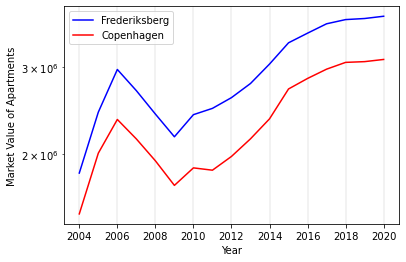

In [38]:
### BEGIN SOLUTION

url = construct_link('EJDFOE1', ['Tid=*', 'BOPKOM=101', 'EJENTYP=B', 'VAERDI=100', 'ENHED=120'])

data = create_data(url)
odsherred = list(data.values())

plot_values(frederiksberg, odsherred)

### END SOLUTION

# Part 5: Bonus Exercises $-$ Traffic Data in Copenhagen

This set of bonus exercises allows you to apply the tools that you have learned in previous sessions. Note that they are not mandatory $-$ rather, our hopes are the exercises will provide you with an additional opportunity to (i) strenghten your data structuring skills and (ii) see how you have already learned a series of skills that work nicely together. 

In this set of bonus exercises, you will be working with traffic data from Copenhagen Municipality.

The municipality have made the data openly available through the [opendata.dk](http://www.opendata.dk/) platform. We will use the data from traffic counters to construct a dataset of hourly traffic. We will use this data to get basic insights on the development in traffic over time and relate it to weather. The gist here is to practice a very important skill in Data Science: being able to quickly fetch data from the web and structure it so that you can work with it. Scraping usually gets a bit more advanced than what we will do today, but the following exercises should give you a taste for how it works. The bulk of these exercise, however, revolve around using the Pandas library to structure and analyze data.

## Part 5A: Getting some data to work with

Hence follows a simple scraping exercise where you (1) collect urls for datasets in the webpage listing data on traffic counters and (2) use these urls to load the data into one dataframe.

> **Ex. 8.5.1:** *(Bonus)* Using the requests module, extract the html markup of the webpage data.kk.dk/dataset/faste-trafiktaellinger and store it as a string in a new variable.

In [39]:
### BEGIN SOLUTION
from requests import get 

url = 'https://www.opendata.dk/city-of-copenhagen/faste-trafiktaellinger'
resp = get(url)

html = resp.text
### END SOLUTION

> **Ex. 8.5.2:** *(Bonus)* Using the re module, extract a list of all the urls in the html string and store them in a new variable.

> _Hint:_ Try using the re.findall method. You may want to Google around to figure out how to do this. Searching for something along the lines of "extract all links in html regex python" and hitting the first StackOverflow link will probably get you farther than reading elaborate documentation.

In [40]:
import re 

### BEGIN SOLUTION
rehits = re.findall(r'href=[\'"]?([^\'" >]+)', html)
### END SOLUTION

> **Ex. 8.5.3:** *(Bonus)* Create a new variable `datalinks` that only contains the links that point to downloadable traffic data sheets. Some links may be preset more than once on the page. To get the unique links use the `set()` function on `datalinks`.

> _Hint:_ You want to filter the results from above. For example to only include urls with the term 'download' in them.

In [41]:
### BEGIN SOLUTION
datalinks = set([url for url in rehits if 'download' in url])
### END SOLUTION

> **Ex. 8.5.4:** *(Bonus)* Using pd.read_excel method, load the datasets into a list. Your resulting variable should hold a list of Pandas dataframes.

> _Hint:_ you may want to set the `skiprows` keyword argument. 

In [50]:
### BEGIN SOLUTION
import pandas as pd
traffic_raw = [pd.read_excel(url, skiprows = 10) for url in datalinks]
### END SOLUTION

KeyboardInterrupt: 

> **Ex. 8.5.5:** *(Bonus)* Merge the list of dataframes into a single dataframe.

In [ ]:
### BEGIN SOLUTION
final_data = pd.concat(traffic_raw)
final_data
### END SOLUTION

## Part 5B: Structuring your data

If you successfully completed the previous part, you should now have a dataframe with about 200.000 rows (if your number of rows is close but not the same, worry not—it matters little in the following). Well done! But the data is still in no shape for analysis, so we must clean it up a little.

200.000 rows (and 30 columns) is a lot of data. ~3.3 MB by my back-of-the-envelope calculations, so not "Big Data", but still enough to make your CPU heat up if you don't use it carefully. Pandas is built to handle fairly large dataframes and has advanced functionality to perform very fast operations even when the size of your data grows huge. So instead of working with basic Python we recommend working pandas built-in procedures as they are constructed to be fast on dataframes.

Nerd fact: the reason pandas is much faster than pure Python is that dataframes access a lower level programming languages (namely C, C++) which are multiple times faster than Python. The reason it is faster is that it has a higher level of explicitness and thus is more difficult to learn and navigate.

> **Ex. 8.5.6:** *(Bonus)* Reset the row indices of your dataframe so the first index is 0 and the last is whatever the number of rows your dataframe has. Also drop the column named 'index' and the one named `Spor`.

In [51]:
### BEGIN SOLUTION
final_data = final_data\
        .reset_index()\
        .drop(['index', 'Spor'], axis = 1)
### END SOLUTION

NameError: name 'final_data' is not defined

> **Ex. 8.5.7:** *(Bonus)* Rename variables from Danish to English using the dictionary below.

```python 
dk_to_uk = {
    'Vejnavn':'road_name',
    '(UTM32)':'UTM32_north',
    '(UTM32).1':'UTM32_east',
    'Dato':'date',
    'Vej-Id':'road_id'
}
```

In [ ]:
### BEGIN SOLUTION
dk_to_uk = {
    'Vejnavn':'road_name',
    '(UTM32)':'UTM32_north',
    '(UTM32).1':'UTM32_east',
    'Dato':'date',
    'Vej-Id':'road_id'
}


final_data = final_data.rename(columns = dk_to_uk)
### END SOLUTION

Python is quite efficient. For example, when you create a new dataframe by manipulating an old one, Python notices that—apart from some minor changes—these two objects are almost the same. Since memory is a precious resource, Python will represent the values in the new dataframe as references to the variables in the old dataset. This is great for performance, but if you for whatever reason change some of the values in your old dataframe, values in the new one will also change—and we don't want that! Luckily, we can break this dependency.

> **Ex. 8.5.8:** *(Bonus)* Break the dependencies of the dataframe that resulted from Ex. 5.2.7 using the `.copy` method. Delete all other dataframes.

In [ ]:
### BEGIN SOLUTION
new_data = final_data.copy()

del final_data
### END SOLUTION

Once you have structured appropriately, something that you will want to do again and again is selecting subsets of the data. Specifically, it means that you select specific rows in the dataset based on some column values.

>**Ex. 8.5.9:** *(Bonus)* Create a new column in the dataframe called total that is True when the last letter of road_id is T and otherwise False.

> _Hint:_ you will need the `pd.Series.str` attribute for this.

In [ ]:
### BEGIN SOLUTION
new_data['total'] = (new_data.road_id.str[-1] == 'T')
### END SOLUTION

> **Ex. 8.5.10:** *(Bonus)* Select rows where total is True. Delete all the remaining observations.

In [ ]:
### BEGIN SOLUTION
total_data = new_data[new_data.total == True]

del new_data
### END SOLUTION

> **Ex. 8.5.11:** *(Bonus)* Make two datasets based on the lists of columns below. Call the dataset with spatial columns data_geo and the other data.

```python
# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = ['kl.{}-{}'.format(str(h).zfill(2), str(h+1).zfill(2)) for h in range(24)]
select_columns = ['road_name', 'date'] + hours
```

In [ ]:
### BEGIN SOLUTION
# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = [f'kl.{str(h).zfill(2)}-{str(h+1).zfill(2)}' for h in range(24)]
select_columns = ['road_name', 'date'] + hours

# selections
data_geo = total_data[spatial_columns]
data  = total_data[select_columns]

del total_data
### END SOLUTION

> **Ex. 8.5.12:** *(Bonus)* Drop the duplicate rows in data_geo.

In [ ]:
### BEGIN SOLUTION
data_geo.drop_duplicates(inplace = True)
### END SOLUTION

**Formatting: wide and narrow format**

When talking about two-dimensional data (matrices, tables or dataframes, we can call it many things), we can either say that it is in wide or long format (see explanation here, "wide" and "long" are used interchangably). In Pandas we can use the commands stack and unstack to move between these formats.

The wide format has the advantage that it often requires less storage and is easier to read when printed. On the other hand the long format can be easier for modelling, because each observation has its own row. Turns out that the latter is what we most often need.

> **Ex. 8.5.13:** *(Bonus)* Turn the dataset from wide to long so hourly data is now vertically stacked. Store this dataset in a dataframe called data. Name the column with hourly information hour_period. Your resulting dataframe should look something like this.

> _Hint:_ pandas' melt function may be of use.

In [ ]:
### BEGIN SOLUTION

# A bonus info: This function is written using optional type declaration. This
# is used to communicate what type the inputs should be. It doesn't affect the 
# functionality in any way, but it can sometimes increase readability. 

def gather(df: pd.DataFrame, key: str, value: str, cols: list) -> pd.DataFrame:
    """ This helper makes pythons melt() behave like R's gather()
    """
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )

data_long = gather(data, 'hour_period', 'value', hours)

# # using .stack() 
# # dropna = False in stack() is necessary for the dataframe to be exactly equal to the one above
# data_long = data.set_index(["road_name", "date"])\
#                 .stack(dropna=False)\
#                 .reset_index()\
#                 .rename(columns = {"level_2": "hour_period", 0: "value"})

### END SOLUTION

**Categorical data**

Categorical data can contain Python objects, usually strings. These are smart if you have variables with string observations that are long and often repeated, e.g. with road names.

> **Ex. 8.5.14:** *(Bonus)* Use the `.astype` method to convert the type of the road_name column to categorical.

In [ ]:
### BEGIN SOLUTION
data_long.road_name = data_long.road_name.astype('category')
### END SOLUTION

## Part 5C:  Structure temporal data

Pandas has native support for working with temporal data. This is handy as much 'big data' often has time stamps which we can make Pandas aware of. Once we have encoded temporal data it can be used to extract information such as the hour, second etc.

> **Ex. 8.5.15:** *(Bonus)* Create a new column called hour which contains the hour-of-day for each row. 

In [ ]:
### BEGIN SOLUTION
data_long['hour'] = pd.to_datetime(data_long['hour_period'].str[3:5], format = '%H')
### END SOLUTION

>**Ex. 8.5.16:** *(Bonus)* Create a new column called time, that contains the time of the row in datetime format. Delete the old temporal columns (hour, hour_period, date) to save memory.

> _Hint:_ try making an intermediary series of strings that has all temporal information for the row; then use pandas to_datetime function where you can specify the format of the date string.

In [ ]:
### BEGIN SOLUTION
data_long['timestamp'] = pd.to_datetime(data_long.date + ' ' + data_long.hour\
                                                                        .dt\
                                                                        .hour\
                                                                        .astype(str)\
                                                                        .apply(lambda x: x.zfill(2)),
                                        format = '%d.%m.%Y %H')

data_long = data_long.drop(['hour', 'hour_period', 'date'], axis = 1)
### END SOLUTION

> **Ex. 8.5.17:** *(Bonus)* Using your time column make a new column called weekday which stores the weekday (in values between 0 and 6) of the corresponding datetime.

> _Hint:_ try using the dt method for the series called time; dt has some relevant methods itself.

In [ ]:
### BEGIN SOLUTION
data_long['weekday'] = data_long.timestamp.dt.weekday
### END SOLUTION

## Part 5D: Statistical descriptions of traffic data

> **Ex. 8.5.18:** *(Bonus)* Print the "descriptive statistics" of the traffic column. Also show a kernel density estimate of the values.

> _Hint:_ Use the describe method of pandas dataframes for the first task. Use seaborn for the second. 

In [ ]:
import seaborn as sb

### BEGIN SOLUTION
print(data_long.value.describe())

sb.kdeplot(data_long.value.dropna())
plt.show()
### END SOLUTION

> **Ex. 8.5.19:** *(Bonus)* Which road has the most average traffic?

In [ ]:
### BEGIN SOLUTION
data_long.groupby('road_name')\
         .value.agg('mean')\
         .reset_index()\
         .sort_values('value', ascending = False)\
         .head(10)
### END SOLUTION

> **Ex. 8.5.20:** *(Bonus)* Compute annual, average road traffic during day hours (9-17). Which station had the least traffic in 2013? Which station has seen highest growth in traffic from 2013 to 2014?

In [ ]:
### BEGIN SOLUTION
# create year variable
data_long['year'] = data_long.timestamp.dt.year
data_long['hour'] = data_long.timestamp.dt.hour

# subset relevant years and times 
data_delta = data_long.query("year == 2013 | year == 2014")\
                      .query("hour >= 9 & hour <= 17")

# convert to wide format
data_delta = data_delta[['road_name', 'value', 'year']].groupby(['road_name', 'year'])\
                                                       .agg('mean')\
                                                       .reset_index()\

# create year variable
data_long['year'] = data_long.timestamp.dt.year
data_long['hour'] = data_long.timestamp.dt.hour

# subset relevant years and times 
data_delta = data_long.query("year == 2013 | year == 2014")\
                      .query("hour >= 9 & hour <= 17")

# convert to wide format
data_delta = data_delta[['road_name', 'value', 'year']].groupby(['road_name', 'year'])\
                                                       .agg('mean')\
                                                       .reset_index()\
                                                       .pivot('road_name', 'year', 'value')\
                                                       .reset_index()
# remove redundant column name after pivoting 
data_delta.columns.name = None

# calculate relative size
data_delta['growth'] = (data_delta[2014]/data_delta[2013] - 1)*100

# show
data_delta.sort_values('growth', ascending = False)
### END SOLUTION